# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 8</span>


The variational principle in Quantum Mechanics states that the expectation value of the Hamiltonian over a (good) trial quantum state has the ground state energy $E_0$ as lower bound:

$$
\langle {\hat H} \rangle_T = 
\frac{\int dx \Psi^*_T(x) {\hat H} \Psi_T(x)}
{\int dx |\Psi_T(x)|^2} \ge E_0 =
\frac{\langle \Psi_0| {\hat H} | \Psi_0 \rangle}
{\langle \Psi_0 | \Psi_0 \rangle}
$$

During this exercise you will variationally optimize the ground state of a single quantum particle in a one dimensional (1D) space confined by the following external potential:
$$
V(x) = x^4 - \frac{5}{2}x^2
$$

This 1D quantum model is not analytically solvable and should be attacked by numerical methods. In order to obtain an approximate wave function for the ground state, the Variational Monte Carlo method uses a trial wave function, parametrized by a set of variational parameters. An approximate model for the ground state wave function is the following trial wave function:
$$
\Psi_T^{\sigma,\mu}(x) \propto e^{-\frac{(x-\mu)^2}{2\sigma^2}}+
                               e^{-\frac{(x+\mu)^2}{2\sigma^2}}
$$

$\Psi_T^{\sigma,\mu}(x)$ depends on <span style="color:red">two variational parameters: $\sigma$ and $\mu$</span>.

### Exercise 08.2

To find the parameters $\sigma$ and $\mu$ which minimize $\langle {\hat H} \rangle_T$, extend your Variational Monte Carlo code to face the variational optimization problem via a <span style="color:red">Simulated Annealing (SA) algorithm</span>.

Choose an appropriate starting temperature for your SA algorithm and an appropriate temperature-update-law to make the optimization work.

Compute $\langle {\hat H} \rangle_T$ with enough statistics in order to be able to measure the lowering of $\langle {\hat H} \rangle_T$ once the variational parameters are moved.
- <span style="color:red">Show a picture of $\langle {\hat H} \rangle_T$ (with statistical uncertainties) as a function of the SA steps of the algorithm</span>
- you could also show a picture of the trajectory of the SA algorithm in the variational parameter space as a function of the SA steps

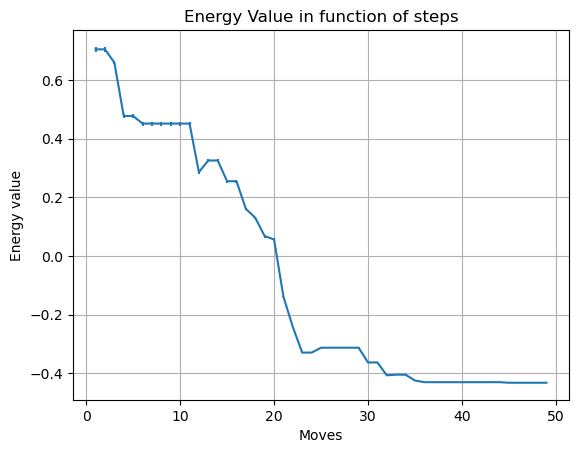

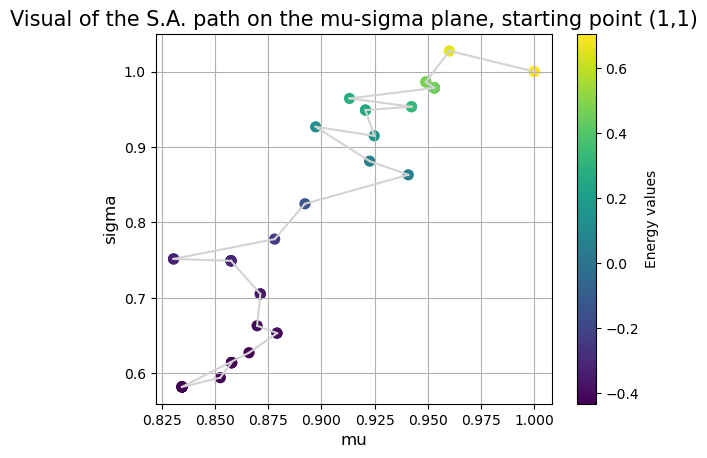

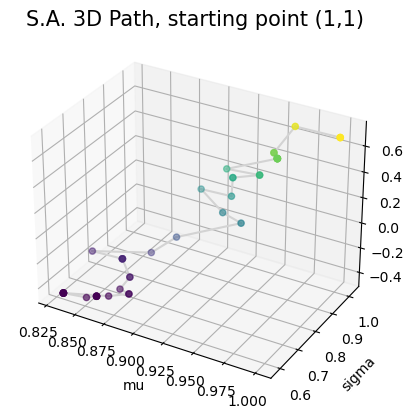

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import math

#grafico Energia

step, Energy, error = np.loadtxt("Energies.dat", unpack='true')
plt.errorbar(step, Energy, yerr = error)

plt.xlabel('Moves')
plt.ylabel('Energy value')
plt.title('Energy Value in function of steps')
plt.grid(True) 
plt.show()

#grafico visione 2D 

mu, sigma  = np.loadtxt("mu-sigma.dat", unpack = 'true', usecols = (1, 2))

colors = np.arange(len(mu))  # Array di valori per la scala di colori

plt.scatter(mu, sigma, marker='o', c=Energy, cmap='viridis', s = 50)

colorbar = plt.colorbar()
colorbar.set_label('Energy values')

for i in range(len(mu)-1): #aggiunta segmenti
    plt.plot([mu[i], mu[i+1]], [sigma[i], sigma[i+1]], color='lightgrey')

plt.xlabel('mu',fontsize = 12)
plt.ylabel('sigma', fontsize  = 12)
plt.title('Visual of the S.A. path on the mu-sigma plane, starting point (1,1)', fontsize  = 15)
plt.grid(True) 
plt.show()

#plot 3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(mu, sigma, Energy, c=Energy, cmap='viridis')
for i in range(len(mu)-1):
    plt.plot([mu[i], mu[i+1]], [sigma[i], sigma[i+1]], [Energy[i],Energy[i+1]], color='lightgrey')

    
ax.set_box_aspect([14, 10, 10])
ax.set_xlabel('mu')
ax.set_ylabel('sigma')
ax.set_zlabel('Energy')
ax.set_title('S.A. 3D Path, starting point (1,1)', fontsize = 15)

plt.show()


- <span style="color:red">show a picture of the estimation of $\langle {\hat H} \rangle_T$ </span> and its statistical uncertainty as a function of the number of blocks/MC steps <span style="color:red">for the set of parameters which minimize $\langle {\hat H} \rangle_T$</span> 

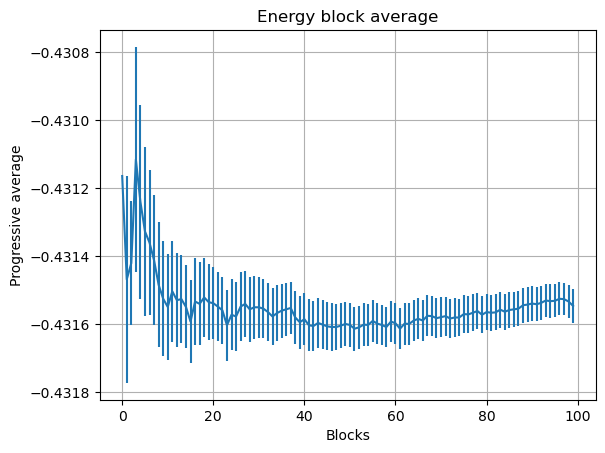

In [3]:
#grafico Energia

step, Energy, error = np.loadtxt("Best_E.dat", unpack='true')
plt.errorbar(step, Energy, yerr = error)

plt.xlabel('Blocks')
plt.ylabel('Progressive average')
plt.title('Energy block average')
plt.grid(True) 
plt.show()

- <span style="color:red">show also a picture **of the sampled** $|\Psi_T(x)|^2$</span> by filling a histogram with the sampled configurations, moreover compare it with the analytic curve of $|\Psi_T(x)|^2$ and with the numerical solution obtained by transforming the Schrodinger equation into a matrix equation.

Ground state energy:  -0.46046587969271563
1st excited state energy:  0.09742471331760998
2nd excited state energy:  1.971733134393021


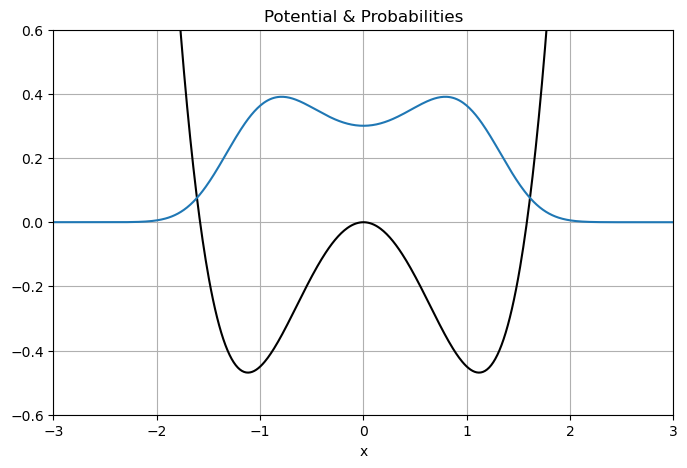

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def Vpot(x):
    return (x**2 - 2.5)*x**2
    #return 0.5*x**2

hbar = 1
m = 1
a = 10
N = 1000 # number of iterations

# Step sizes
x = np.linspace(-a/2, a/2, N)
dx = x[1] - x[0] # the step size
V = Vpot(x)

# The central differences method: f" = (f_1 - 2*f_0 + f_-1)/dx^2

CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)
# np.diag(np.array,k) construct a "diagonal" matrix using the np.array
# The default is k=0. Use k>0 for diagonals above the main diagonal, 
# and k<0 for diagonals below the main diagonal

# Hamiltonian matrix
H = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(V)

# Compute eigenvectors and their eigenvalues
E,psi = np.linalg.eigh(H)

# Take the transpose & normalize
psi = np.transpose(psi)
psi = psi/np.sqrt(dx)

print("Ground state energy: ", E[0])
print("1st excited state energy: ", E[1])
print("2nd excited state energy: ", E[2])

# Plot a few things
plt.figure(figsize=(8,5))
scale = 0.3
plt.plot(x, scale*V, color="Black", label="Potential") # plot the potential


plt.plot(x,(psi[0])**2)
#plt.plot(x,(psi[1])**2)
#plt.plot(x,(psi[2])**2)
plt.title("Potential & Probabilities")
plt.xlabel("x")
plt.grid(True)
plt.xlim((-3,3))
plt.ylim((-0.6,0.6))
plt.show()





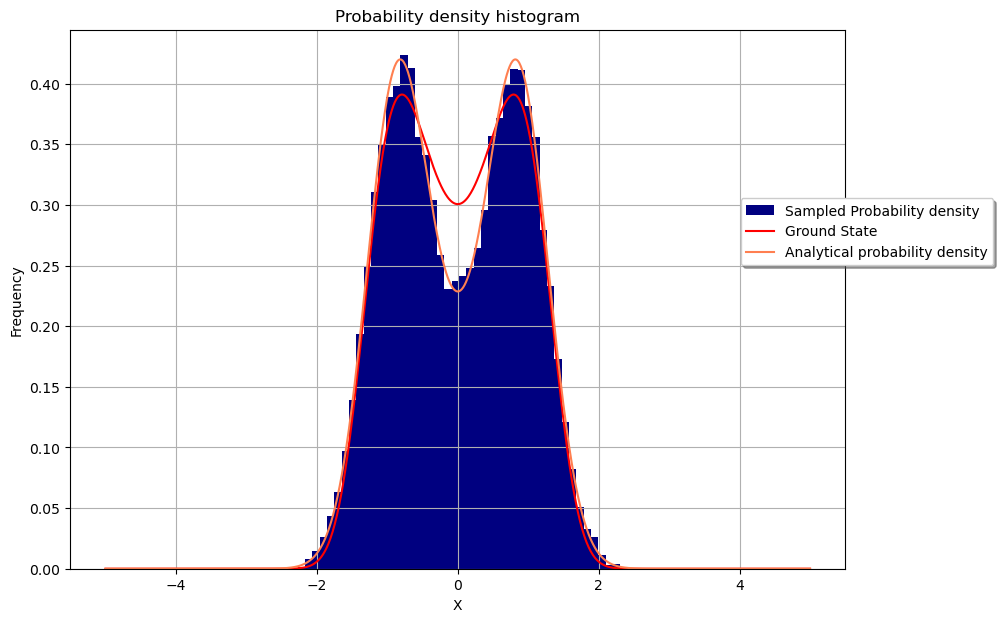

In [6]:
import matplotlib.pyplot as plt
m = 0.857776 
s = 0.614162

function = 0.402*(np.exp(-(x-m)**2/(2*(s)**2))+np.exp(-(x+m)**2/(2*(s)**2)))**2

# Carica i numeri dal file
with open('histo.dat', 'r') as file:
    numeri = [float(line.strip()) for line in file]

# Disegna l'istogramma
fig = plt.figure(figsize=(10, 7))
hist = plt.hist(numeri, bins=50, density = True, color='navy') 

psi_matrix = plt.plot(x,(psi[0])**2, color = 'red')
psi_analytic = plt.plot(x, function, color = 'coral')

plt.legend(handles=[hist[2][0], psi_matrix[0], psi_analytic[0]], 
           labels=['Sampled Probability density', 'Ground State', 'Analytical probability density'],
           bbox_to_anchor=(1.2, 0.7), ncol=1, fancybox=True, shadow=True)

plt.xlabel('X')
plt.ylabel('Frequency')
plt.title('Probability density histogram')
plt.grid(True)
plt.show()